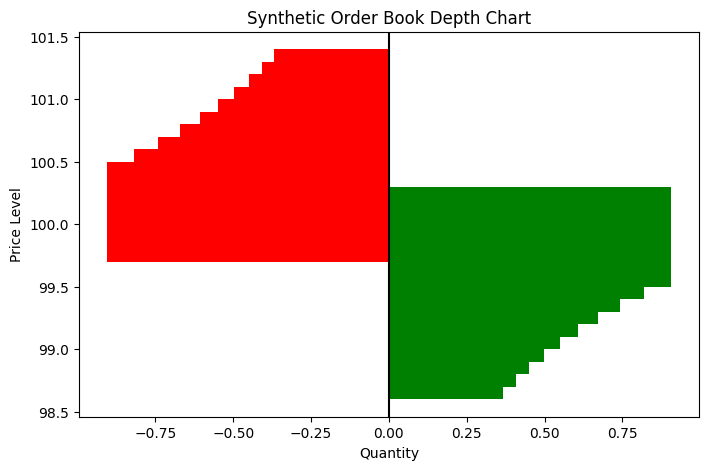

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mid_price = 100

# synthetic prices
bid_prices = np.arange(99.9, 99.0, -0.1)
ask_prices = np.arange(100.1, 101.0, 0.1)

# synthetic sizes (more size near mid)
bid_sizes = np.exp(-(mid_price - bid_prices))
ask_sizes = np.exp(-(ask_prices - mid_price))

plt.figure(figsize=(8,5))
plt.barh(bid_prices, bid_sizes, color='green')
plt.barh(ask_prices, -ask_sizes, color='red')  # negative to mirror

plt.axvline(0, color='black')
plt.title("Synthetic Order Book Depth Chart")
plt.xlabel("Quantity")
plt.ylabel("Price Level")
plt.show()


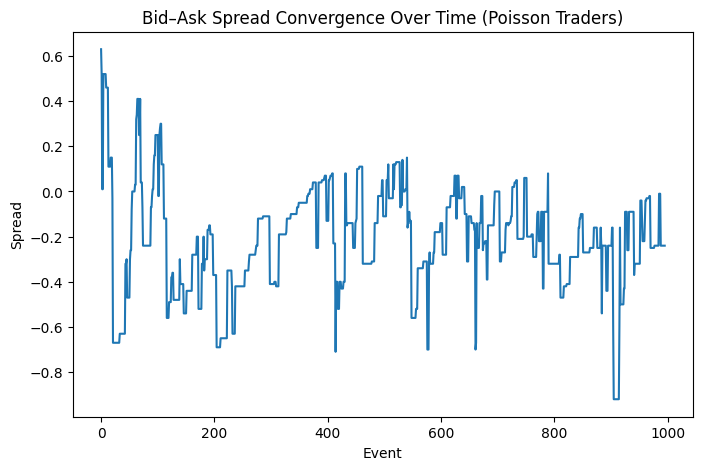

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

np.random.seed(42)

mid = 100
bid_book = defaultdict(float)
ask_book = defaultdict(float)

best_bid_series = []
best_ask_series = []

def best_bid():
    return max(bid_book.keys()) if bid_book else None

def best_ask():
    return min(ask_book.keys()) if ask_book else None

for t in range(1000):

    # Poisson arrivals = exponential spacing
    # (we ignore real time & just simulate sequence)
    
    order_type = np.random.choice(["limit_buy","limit_sell","market_buy","market_sell"], p=[0.35,0.35,0.15,0.15])
    
    price_noise = np.random.normal(0, 0.3)
    qty = np.random.uniform(1,5)

    if order_type=="limit_buy":
        p = round(mid - abs(np.random.exponential(0.5)) + price_noise,2)
        bid_book[p] += qty

    elif order_type=="limit_sell":
        p = round(mid + abs(np.random.exponential(0.5)) + price_noise,2)
        ask_book[p] += qty

    elif order_type=="market_buy":
        a = best_ask()
        if a is not None:
            ask_book[a] -= qty
            if ask_book[a] <= 0:
                del ask_book[a]

    elif order_type=="market_sell":
        b = best_bid()
        if b is not None:
            bid_book[b] -= qty
            if bid_book[b] <= 0:
                del bid_book[b]

    b = best_bid()
    a = best_ask()

    if b is not None and a is not None:
        best_bid_series.append(b)
        best_ask_series.append(a)

spread_series = np.array(best_ask_series) - np.array(best_bid_series)

plt.figure(figsize=(8,5))
plt.plot(spread_series)
plt.title("Bid–Ask Spread Convergence Over Time (Poisson Traders)")
plt.xlabel("Event")
plt.ylabel("Spread")
plt.show()


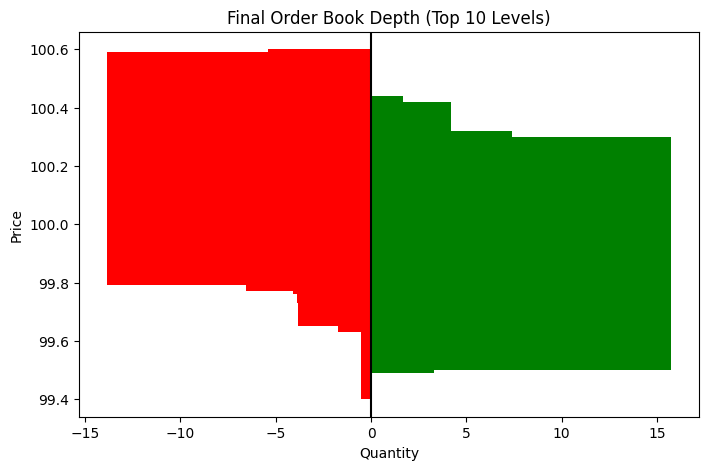

In [4]:
bids = sorted(bid_book.items(), reverse=True)[:10]
asks = sorted(ask_book.items())[:10]

bid_prices = [p for p,_ in bids]
bid_sizes  = [q for _,q in bids]

ask_prices = [p for p,_ in asks]
ask_sizes  = [q for _,q in asks]

plt.figure(figsize=(8,5))
plt.barh(bid_prices, bid_sizes, color='green')
plt.barh(ask_prices, -np.array(ask_sizes), color='red')
plt.axvline(0,color='black')
plt.title("Final Order Book Depth (Top 10 Levels)")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.show()
